In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,18 mins 52 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_ln7r3v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.127 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
boston = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/gbm_test/BostonHousing.csv")

# Podział danych na zbiór treningowy i testowy (70/30)
train, test = boston.split_frame(ratios=[0.7], seed=42)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y = "medv"  # zmienna docelowa (mediana wartości domów)
x = boston.columns  # wszystkie kolumny są predyktorami, ale...
x.remove(y)         # ...usuwamy zmienną docelową
x.remove("chas")

In [ ]:
aml = H2OAutoML(
    max_runtime_secs=120,  # czas eksperymentu
    seed=42,
    nfolds=5,              # 5-krotna walidacja krzyżowa
    stopping_metric="RMSE"
)
aml.train(x=x, y=y, training_frame=train, validation_frame=test)

AutoML progress: |
22:41:39.766: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
lb = aml.leaderboard
print(lb.head())

model_id                                                    rmse       mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20250601_224139  2.97292   8.83825  2.0323   0.125254                   8.83825
StackedEnsemble_AllModels_3_AutoML_2_20250601_224139     3.05985   9.36268  2.05343  0.127512                   9.36268
GBM_grid_1_AutoML_2_20250601_224139_model_13             3.08807   9.53615  2.15066  0.128628                   9.53615
StackedEnsemble_BestOfFamily_3_AutoML_2_20250601_224139  3.1185    9.72506  2.08706  0.128327                   9.72506
StackedEnsemble_AllModels_2_AutoML_2_20250601_224139     3.12956   9.79417  2.10039  0.128773                   9.79417
GBM_grid_1_AutoML_2_20250601_224139_model_5              3.13144   9.80592  2.1342   0.134655                   9.80592
GBM_grid_1_AutoML_2_20250601_224139_model_4              3.1794   10.1086   2.17229  0.130919                  10.1086
GBM_grid_1_AutoML_2_20250601_224139_model

In [ ]:
best_model = aml.leader
pred = best_model.predict(test)

# Połączenie wyników z danymi testowymi
results = test.cbind(pred)
results = results[:, ["medv", "predict"]]
results = results.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


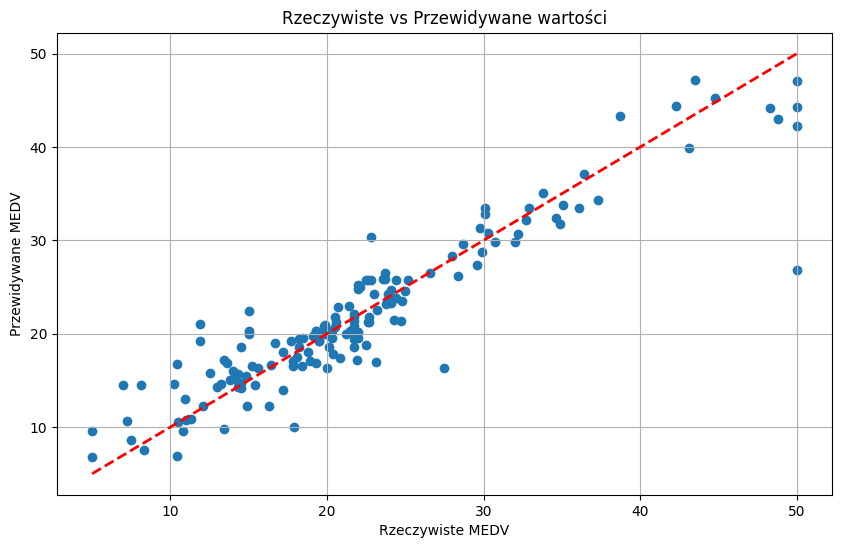

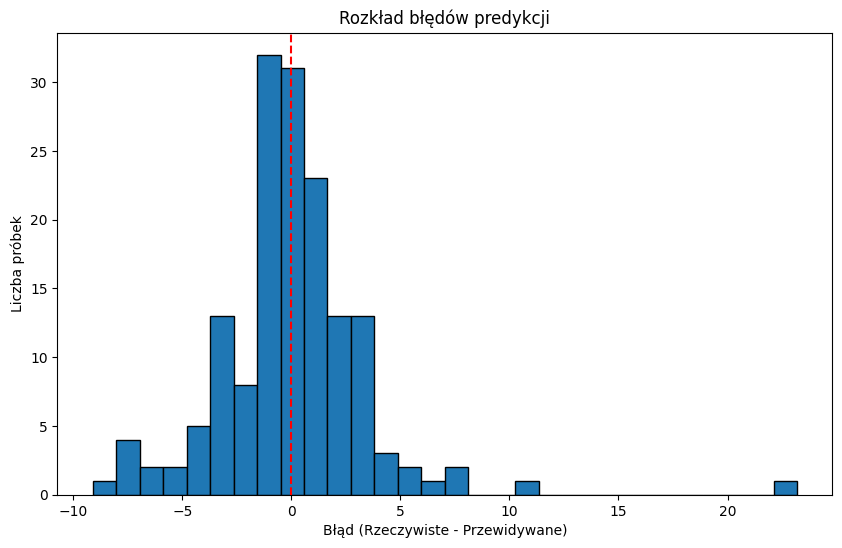

In [ ]:
performance = best_model.model_performance(test_data=test)
# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(results["medv"], results["predict"])
plt.plot([results["medv"].min(), results["medv"].max()],
         [results["medv"].min(), results["medv"].max()],
         'r--', lw=2)
plt.title("Rzeczywiste vs Przewidywane wartości")
plt.xlabel("Rzeczywiste MEDV")
plt.ylabel("Przewidywane MEDV")
plt.grid(True)
plt.show()

# Histogram błędów
errors = results["medv"] - results["predict"]
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Rozkład błędów predykcji")
plt.xlabel("Błąd (Rzeczywiste - Przewidywane)")
plt.ylabel("Liczba próbek")
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Definicja hiperparametrów do tuningu
gbm_params = {
    "learn_rate": [0.01, 0.1],
    "max_depth": [3, 5, 7],
    "ntrees": [50, 100]
}

# Utworzenie modelu bazowego GBM z ustalonymi parametrami
gbm_base = H2OGradientBoostingEstimator(
    nfolds=5,
    seed=42,
    stopping_metric="RMSE",
    stopping_rounds=5,
    score_each_iteration=True
)

# Utworzenie i uruchomienie grid search
gbm_grid = H2OGridSearch(
    model=gbm_base,
    grid_id="gbm_grid",
    hyper_params=gbm_params
)

gbm_grid.train(
    x=x,
    y=y,
    training_frame=train,
    validation_frame=test
)

# Pobranie wyników grid search
grid_perf = gbm_grid.get_grid(sort_by="rmse", decreasing=False)

# Wyświetlenie rankingu modeli
print(grid_perf)

# Wybór najlepszego modelu z grid search
best_gbm = grid_perf.models[0]

# Ocena najlepszego modelu na zbiorze testowym
gbm_perf = best_gbm.model_performance(test)
print(f"Best GBM RMSE: {gbm_perf.rmse():.4f}")
print(f"Best GBM parameters: {best_gbm.actual_params}")

# Wyświetlenie metryk
print("\nFull model performance metrics:")
print(gbm_perf)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing rmse
     learn_rate    max_depth    ntrees    model_ids          rmse
---  ------------  -----------  --------  -----------------  ------------------
     0.1           3.0          81.0      gbm_grid_model_20  3.5117098393672013
     0.1           3.0          81.0      gbm_grid_model_8   3.5117098393672013
     0.1           7.0          72.0      gbm_grid_model_12  3.51688620947874
     0.1           7.0          72.0      gbm_grid_model_24  3.51688620947874
     0.1           5.0          68.0      gbm_grid_model_10  3.584263506234962
     0.1           5.0          68.0      gbm_grid_model_22  3.584263506234962
     0.1           7.0          47.0      gbm_grid_model_18  3.6315049339135697
     0.1           7.0          47.0      gbm_grid_model_6   3.6315049339135697
     0.1           3.0          50.0      gbm_grid_model_14  3.649